#Theoretical

###1.  What is Logistic Regression, and how does it differ from Linear Regression?

Statistical model used for the classification problems.
Linear regression predicts continuous values, Logistic regression predicts the probability for a value to fall inside a class.

###2. What is the mathematical equation of Logistic Regression?

𝜎(𝑧)=1/(1+𝑒**−𝑧)

###3. Why do we use the Sigmoid function in Logistic Regression?

Sigmoid function transforms the input to a value between 0 & 1.This is crucial for the classification tasks.

Sigmoid function provides
Smooth decision boundary
Output in probability
Thresold based classification

###4. What is the cost function of Logistic Regression?
𝐽(𝜃)=
−1/m 𝑖=1 to 𝑚
 ∑[𝑦(𝑖)log⁡(ℎ𝜃(𝑥(𝑖)))+(1−𝑦(𝑖))log⁡(1−ℎ𝜃(𝑥𝑖)))]


𝐽(𝜃) - cost function
m - number of training examples
𝑦(𝑖) - actual value
ℎ𝜃(𝑥(𝑖)) -predicted value using the ℎ𝜃, =1/(1+𝑒**−𝜃𝑇𝑥)

###5. What is Regularization in Logistic Regression? Why is it needed?

Regularization is used as a penalty in the cost function to reduce overfitting & select the most relevant features

+𝜆 𝑗=1 to n ∑ ∣𝜃𝑗∣ (l1/Lasso)

𝜆 is penalty strength
𝜃𝑗 is the coefficient


###6. Explain the difference between Lasso, Ridge, and Elastic Net regression

Lasso - Penalty is 𝑗=1 to n ∑ ∣𝜃𝑗∣ , Can bring down the coefficient to zero, helps in feature selection

Ridge - Penalty is 𝑗=1 to n ∑ 𝜃𝑗**2 , Can not bring down the coefficient to zero, helps in reducing overfitting

Elastic net - combination of both lasso & Ridge. penalty is addition of lasso penalty + ridge penalty. Shrinks some coefficients to zero and other to lower value.

###7.  When should we use Elastic Net instead of Lasso or Ridge?
Highly correlated features - Groups correlated features together
Large number of features
When feature selection & model generalization both required
Balance of Ridge & Lasso can be fine tuned using the alpha parameter
alpha = 1 - lasso
alpha = 0 Ridge
0 < alpha < 1 means mix of both

###8. What is the impact of the regularization parameter (λ) in Logistic Regression?

λ determines the strength of regularization or the penalty of regularization. high λ means more impact of regularization, 0 means no impact


###9. What are the key assumptions of Logistic Regression?

- No perfect multicollinearity exists
- Each observation in the dataset is independent
- Outcome is binary for OVR
- Large sample size
- All predictors have non zero variance
- Errors are not having any pattern

###10. What are some alternatives to Logistic Regression for classification tasks?

- SVM classifier
- Naive Bayes classifier
- Decision tree clasifier
- KNN
- Boosting algorithms

###11.  What are Classification Evaluation Metrics?

- Accuracy
- precision
- Recall
- F1 score
- ROC AUC
- Confusion matrix

###12.  How does class imbalance affect Logistic Regression?

- Skewed decision boundary towards majority class
- Poor performance for the minority class
- Impacts some of the evaluation metrics like accuracy

###13. What is Hyperparameter Tuning in Logistic Regression?

Hyper parameter tuning is to identify the model parameters which will make the model more accurate and generalised.
Some of the parameters are
- class weights
- solver
- regularization

###14. What are different solvers in Logistic Regression? Which one should be used?

- small dataset - liblinear
- elastic net - saga
- regularization with lasso/ridge - sag/ saga
- multi class clasification - lbfgs

###15. How is Logistic Regression extended for multiclass classification

Logistic reression can be used as
- One vs one - creates binary classification every possible pair of classes
- One vs rest - breaks down the multi class problem into multiple binary classification. the class with the highest probability is selected
- multnomial - uses softmax function to predict probability of all the classes

###16. What are the advantages and disadvantages of Logistic Regression?
 - Advantages
    - Simplicity
    - Provides output in probability that can be checked based on a   thresold
  -Disadvantage
   - Sensitive to outliers
   - Assumes linear relationship

###17. What are some use cases of Logistic Regression?
 - Classification in NLP,or customer behaviour
 - Prediction of continuous varibale in domains like insurance, finance

###18. What is the difference between Softmax Regression and Logistic Regression?

Logistic regression is good fit for binary classification, Softmax is good fit for multi class classification

###19.  How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

OVR is useful for small datasets or imbalanced data sets and also for binary classification.

Sftmax is suited for multi class classification with huge dtaa size.It takes more computation compared to OVR

###20.How do we interpret coefficients in Logistic Regression?

Coefficients determines the unit change in the feature impacts the log odds of the prediction class/positive outcome, when other coefficients are not changed.


#Practical

In [ ]:
###1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
###Regression, and prints the model accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")



(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.95975791 0.04024209]
Model accurac is 1.0


In [ ]:
###2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
###and print the model accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1',C=0.7,solver='liblinear')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")


(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.05847703 0.94152297]
Model accuracy is 1.0


In [ ]:
###3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
###LogisticRegression(penalty='l2'). Print model accuracy and coefficients


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2',C=0.7,solver='lbfgs')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")
print(f"Model coefficients - {model.coef_}")

(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.9460532 0.0539468]
Model accuracy is 1.0
Model coefficients - [[ 0.38765039 -0.8267497   2.02656274  0.84650403]]


In [ ]:
###4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='elasticnet',C=0.7,solver='saga',l1_ratio=0.5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")
print(f"Model coefficients - {model.coef_}")

(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.9914192 0.0085808]
Model accuracy is 1.0
Model coefficients - [[-0.15546817 -1.44485507  2.11568813  0.55202956]]


In [ ]:
###5. Write a Python program to train a Logistic Regression model for multiclass classification using
###multi_class='ovr'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
print(f"Unique targets {df['target'].unique()}")

X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr',solver='lbfgs')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")
print(f"Model coefficients - {model.coef_}")

Unique targets [0 1 2]
Model accuracy is 0.9666666666666667
Model coefficients - [[-0.41688548  0.83053036 -2.20316668 -0.95388947]
 [-0.30758509 -1.94643147  0.83786709 -1.4073381 ]
 [-0.43036227 -0.28995103  2.56978739  2.40384857]]


In [ ]:
###6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
###Regression. Print the best parameters and accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
print(f"Unique targets {df['target'].unique()}")

X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(multi_class='ovr',solver='lbfgs')

from sklearn.model_selection import GridSearchCV

params ={
    'C':[0.5,0.6,0.8,1],
    'penalty':['l1','l2','elasticnet','none']

}

grid_search = GridSearchCV(estimator=logistic_reg,cv=5,param_grid=params,verbose=0,scoring='accuracy')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(f"Best accuracy - {grid_search.best_score_}")

Unique targets [0 1 2]
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, multi_class='ovr')
Best accuracy - 0.925


In [ ]:
###7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
###average accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
print(f"Unique targets {df['target'].unique()}")

X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(multi_class='ovr',solver='lbfgs')

from sklearn.model_selection import StratifiedKFold

sfk_fold = StratifiedKFold(shuffle=True,n_splits=5)

from sklearn.metrics import accuracy_score
acc_score = []
for train_index,test_index in sfk_fold.split(X,y):
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

reg = logistic_reg.fit(X_train,y_train)
pred = reg.predict(X_test)
accuracy = accuracy_score(pred,y_test)
acc_score.append(accuracy)


print(f"Average accuracy {np.mean(acc_score)}")

Unique targets [0 1 2]
Average accuracy 1.0


In [ ]:
###8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
##accuracy

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.78

Confusion Matrix:
[[87 18]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
###9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
###Logistic Regression. Print the best parameters and accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
print(f"Unique targets {df['target'].unique()}")

X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(multi_class='ovr')

from sklearn.model_selection import RandomizedSearchCV

params ={
    'C':[0.5,0.6,0.8,1],
    'penalty':['l1','l2','elasticnet','none'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg','newton-cholesky', 'sag', 'saga']

}

random_search = RandomizedSearchCV(estimator=logistic_reg,cv=5,param_distributions=params,verbose=0,scoring='accuracy')
random_search.fit(X_train,y_train)

print(random_search.best_params_)
print(random_search.best_estimator_)
print(f"Best accuracy - {random_search.best_score_}")


Unique targets [0 1 2]
{'solver': 'sag', 'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, multi_class='ovr', solver='sag')
Best accuracy - 0.95


In [ ]:
###10.  Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a One-vs-One classifier with logistic regression
ovo_classifier = OneVsOneClassifier(LogisticRegression(max_iter=200))
ovo_classifier.fit(X_train, y_train)

y_pred = ovo_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy {accuracy}")

Accuracy 0.9555555555555556


In [ ]:
###11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
##classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

report = classification_report(y_pred,y_test)
print(f"confusion matrix is \n\n{report}")

confusion matrix is 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
###12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
###Recall, and F1-Score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import precision_score,recall_score,f1_score

precision = precision_score(y_pred,y_test)
print(f"precision is {precision}")

recall = recall_score(y_pred,y_test)
print(f"recall is {recall}")

f1 = f1_score(y_pred,y_test)
print(f"f1 is {f1}")

precision is 1.0
recall is 1.0
f1 is 1.0


In [ ]:
###13 Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
###improve model performance

from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=1000,
    n_features=3,
    n_classes = 2,
    weights=[0.1,0.9],
    n_redundant=1
)

noise = np.random.normal(0, 0.5, X.shape)
X[y==1]= X[y==1]+noise[y==1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model1 = LogisticRegression()
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)
report1 = classification_report(y_test, y_pred1)
print(f"report before balancing{report1}")

model2 = LogisticRegression(class_weight={0: 0.2, 1: 0.8})
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)
report2 = classification_report(y_test, y_pred2)
print(f"report after balancing{report2}")

report before balancing              precision    recall  f1-score   support

           0       0.74      0.50      0.60        28
           1       0.95      0.98      0.97       272

    accuracy                           0.94       300
   macro avg       0.84      0.74      0.78       300
weighted avg       0.93      0.94      0.93       300

report after balancing              precision    recall  f1-score   support

           0       1.00      0.25      0.40        28
           1       0.93      1.00      0.96       272

    accuracy                           0.93       300
   macro avg       0.96      0.62      0.68       300
weighted avg       0.94      0.93      0.91       300



In [ ]:
###14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
###evaluate performance

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.78

Confusion Matrix:
[[87 18]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [ ]:
###15.  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
###model. Evaluate its accuracy and compare results with and without scaling

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000, n_features=5, n_classes=2, n_redundant=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy with scaling: {accuracy_with_scaling:.2f}")


Accuracy without scaling: 0.96
Accuracy with scaling: 0.96


In [ ]:
###16.  Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print(f"ROC AUC Score: {roc_auc:.2f}")


Accuracy: 0.78

Confusion Matrix:
[[87 18]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

ROC AUC Score: 0.86


In [ ]:
###17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
###accuracy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1',C=0.5,solver='liblinear')
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")

(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.933327 0.066673]
Model accuracy is 1.0


In [ ]:
###18. Write a Python program to train Logistic Regression and identify important features based on model
###coefficients

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model['classifier'].coef_)
print(f"With the above result it looks the first coefficient is less")
print(model['classifier'].coef_[0])

[[-0.09754606  0.52323951  1.15158524 -1.18414262  0.44256203 -0.22988829
  -0.24523113]]
With the above result it looks the first coefficient is less
[-0.09754606  0.52323951  1.15158524 -1.18414262  0.44256203 -0.22988829
 -0.24523113]


In [ ]:
###19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
###Score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"cohen_kappa_score {cohen_kappa_score(y_pred,y_test)}")

cohen_kappa_score 0.46574252172182795


(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.03908628 0.96091372]
Model accuracy is 1.0


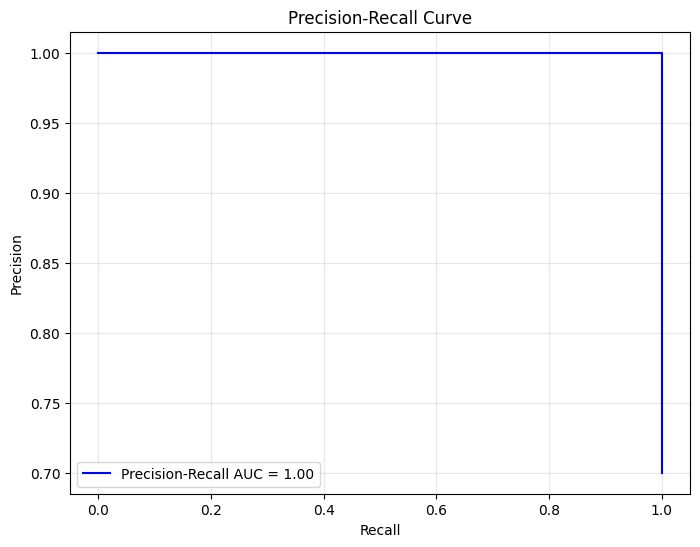

In [ ]:
###20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
###classification

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import precision_recall_curve, auc

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")

from sklearn.metrics import precision_recall_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)

pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall AUC = {pr_auc:.2f}", color='b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
###21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
###their accuracy

from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=1000,
    n_features=3,
    n_classes = 2,
    weights=[0.5,0.5],
    n_redundant=1
)

noise = np.random.normal(0, 0.5, X.shape)
X[y==1]= X[y==1]+noise[y==1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

solver =['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for sol in solver:

  model = LogisticRegression(solver=sol)
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  from sklearn.metrics import accuracy_score

  accuracy = accuracy_score(y_pred,y_test)
  print(f"Model accuracy is {accuracy} with solver {sol}")

Model accuracy is 0.885 with solver lbfgs
Model accuracy is 0.885 with solver liblinear
Model accuracy is 0.885 with solver newton-cg
Model accuracy is 0.885 with solver newton-cholesky
Model accuracy is 0.885 with solver sag
Model accuracy is 0.885 with solver saga


In [ ]:
###22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
###Correlation Coefficient (MCC)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/titanic.csv')

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
target = 'Survived'

X = data[features]
y = data[target]

numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"matthews_corrcoef {matthews_corrcoef(y_pred,y_test)}")

matthews_corrcoef 0.6284629329038053


In [ ]:
###23.  Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
###accuracy to see the impact of feature scaling

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=1000, n_features=5, n_classes=2, n_redundant=1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy with scaling: {accuracy_with_scaling:.2f}")

Accuracy without scaling: 0.90
Accuracy with scaling: 0.90


In [ ]:
###24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
##cross-validation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)
print(f"Unique targets {df['target'].unique()}")

X =df.iloc[:,:-1]
y =df.iloc[:,-1]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(multi_class='ovr',solver='lbfgs')

from sklearn.model_selection import GridSearchCV

params ={
    'C':[0.5,0.6,0.8,1]
}

grid_search = GridSearchCV(estimator=logistic_reg,cv=5,param_grid=params,verbose=0,scoring='accuracy')
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(f"Best accuracy - {grid_search.best_score_}")

Unique targets [0 1 2]
{'C': 1}
LogisticRegression(C=1, multi_class='ovr')
Best accuracy - 0.9583333333333334


In [ ]:
###25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
###make predictions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
df['target'] = pd.DataFrame(data.target)

df = df[df['target']!=2]
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

print(f"{X.shape} {y.shape}")

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f"{X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")


from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(model.predict_proba(X_test)[5])

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred,y_test)
print(f"Model accuracy is {accuracy}")

import joblib

joblib.dump(model, 'logistic_model.pkl')
print("Model saved as 'logistic_model.pkl'.")

loaded_model = joblib.load('logistic_model.pkl')
print("Model loaded successfully.")

loaded_y_pred = loaded_model.predict(X_test)
loaded_y_prob = loaded_model.predict_proba(X_test)[5]

loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print(f"Model accuracy after loading: {loaded_accuracy}")
print(f"Predicted probabilities for the 5th test sample: {loaded_y_prob}")


(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)
[0.0391447 0.9608553]
Model accuracy is 1.0
Model saved as 'logistic_model.pkl'.
Model loaded successfully.
Model accuracy after loading: 1.0
Predicted probabilities for the 5th test sample: [0.0391447 0.9608553]
